In [2]:
import pandas as pd
import numpy as np

# Color Scheme
palette = ["#FFFFEC", "#F1E4C3", "#C6A969", "#597E52"]

## EDA and Pre-processing

### Data Exploration

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

In [3]:
# This dataset is too large for GitHub so used local path here (Need to replace the path here if want to run)
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.describe()
# There are 4 numerical values that we could consider removing since it is not relevant to our text classification

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


First, we dropped columns that are not relevant to this project such as identification information and some numerical columns.

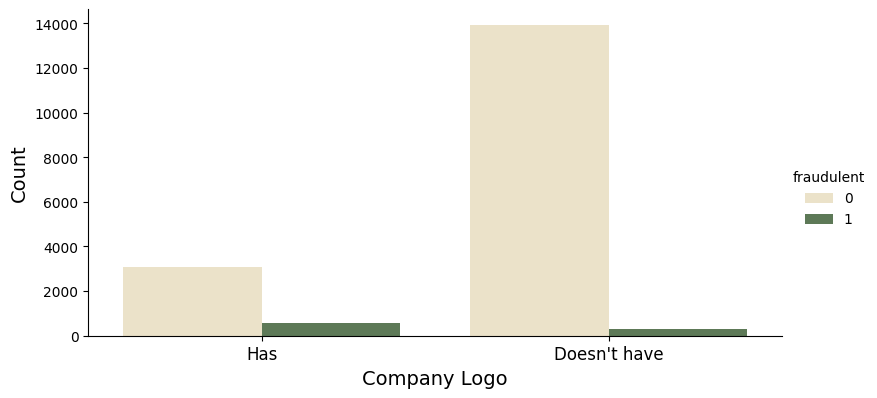

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="has_company_logo", hue="fraudulent", data=df, kind="count", aspect=2, height=4, palette=[palette[1],palette[3]]);

plt.xlabel("Company Logo", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

The post being either real or fake, the majority of the job posts collected in this dataset do not have a company logo. This suggests that not having a logo is not a determining factor.

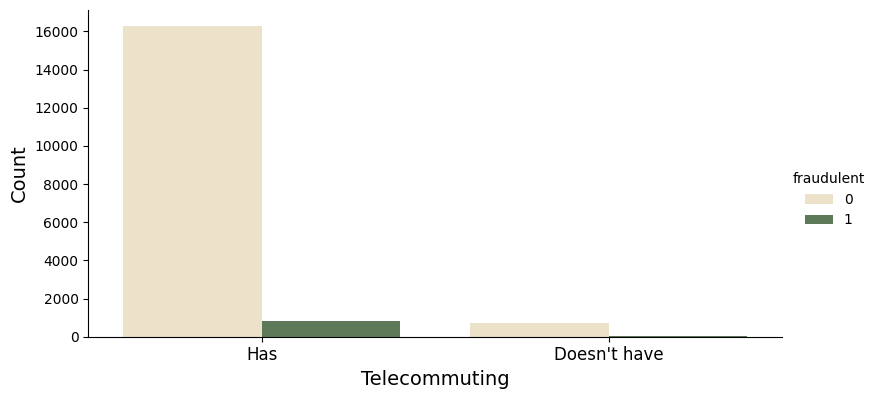

In [73]:
sns.catplot(x="telecommuting", hue="fraudulent", data=df, kind="count", aspect=2, height=4, palette=[palette[1],palette[3]]);

plt.xlabel("Telecommuting", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

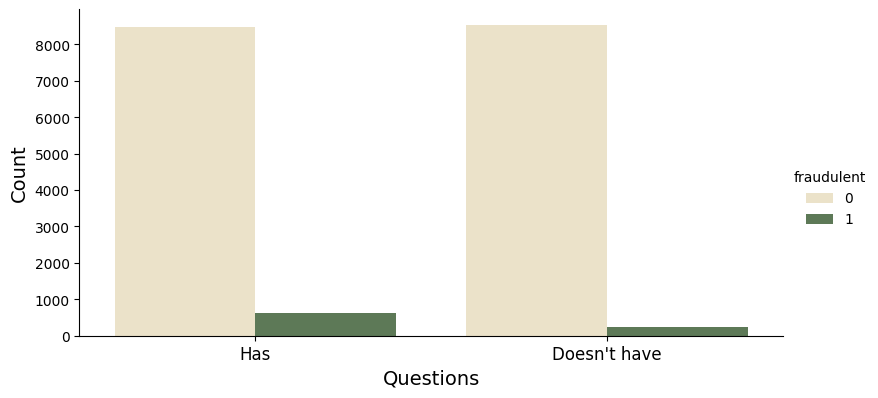

In [74]:
sns.catplot(x="has_questions", hue="fraudulent", data=df, kind="count", aspect=2, height=4, palette=[palette[1],palette[3]]);

plt.xlabel("Questions", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

The similar reasons apply to the other two binary columns telecommuting and has_questions, and therefore and could remove those columns safely.

In [7]:
columns_to_drop = ['job_id', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']
df.drop(columns=columns_to_drop, inplace=True)

Here we check the distribution of fake and real job posts in our dataset, and we found that it is a little imbalanced in favor of the classes. Therefore, finding the characteristics (the most frequent words appearing) of a fake job posting would be not as accurate as we would expect as it only have 866 rows.

In [8]:
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

,fraudulent,title
0,0,17014
1,1,866


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17880 non-null  object
 1   location         17534 non-null  object
 2   company_profile  14572 non-null  object
 3   description      17879 non-null  object
 4   requirements     15184 non-null  object
 5   benefits         10668 non-null  object
 6   industry         12977 non-null  object
 7   function         11425 non-null  object
 8   fraudulent       17880 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


As for this project, we will focus on rows that contains all the text columns (company_profile, description, requirements, and benefits), and we also want to compare the results between different inductries. Therefore, we will filter the dataset by drooping rows that have missing values for all these columns (which only reducing by 1 row here in the dataset).

In [10]:
# Drop rows with missing values in specified columns
columns_to_check = ['company_profile', 'description', 'requirements', 'benefits', 'industry']
df.dropna(subset=columns_to_check, how='all', inplace=True)

df

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Graphic Design,Design,0


Here we check if we could potentially use industry as a category to analysis insights in terms of the fake job posting characteristics, however, since we found that there were not many fake job posts in each industry (some industry does not have fake posts at all), grouping by industry will not add much value to our project.

In [11]:
# Group by 'industry' and count the number of rows in each group
industry_counts = df.groupby('industry').size()

# Print the number of rows in each industry
print(industry_counts)

industry
Accounting                        159
Airlines/Aviation                  63
Alternative Dispute Resolution      1
Animation                           5
Apparel & Fashion                  97
                                 ... 
Warehousing                        51
Wholesale                          11
Wine and Spirits                    1
Wireless                            4
Writing and Editing                19
Length: 131, dtype: int64


In [12]:
# Filter the DataFrame by rows where 'fraudulent' is equal to 1
fraudulent_df = df[df['fraudulent'] == 1]

# Group by 'industry' and count the number of rows in each group
fraudulent_industry_counts = fraudulent_df.groupby('industry').size()

# Print the number of fraudulent rows in each industry
print(fraudulent_industry_counts)


industry
Accounting                          57
Airlines/Aviation                    1
Animation                            2
Apparel & Fashion                    2
Automotive                           5
                                    ..
Telecommunications                  26
Transportation/Trucking/Railroad     3
Utilities                            1
Warehousing                          1
Wholesale                            1
Length: 62, dtype: int64


In [13]:
# Store the filtered dataset as CSV file for later usage
df.to_csv("Filtered_Fake_Jobs.csv", index = False)

### Data Cleaning

In [6]:
post = pd.read_csv("Filtered_Fake_Jobs.csv")
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0


In [7]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Remove newline characters
        text = text.replace('\n', '')
        text = text.replace('\r', '')
        text = text.replace('\t', '')

        # Remove unwanted characters and punctuation marks
        text = re.sub(r'[0-9]', '', text)
        text = re.sub(r'[^\w\s]', '', text)  # Remove all punctuation marks
        text = text.replace('  ', ' ')
    elif isinstance(text, float) and np.isnan(text):
        return ''  # Return empty string if NaN
    return text

post['text'] = post['company_profile'].fillna('') + ' ' + \
               post['description'].fillna('') + ' ' + \
               post['requirements'].fillna('') + ' ' + \
               post['benefits'].fillna('')
post['text'] = post['text'].apply(clean_text)
post['text'] = post['text'].apply(lambda s: s.lower() if isinstance(s, str) else s)

In [8]:
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0,were food and weve created a groundbreaking an...
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0,seconds the worlds cloud video production ser...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0,valor services provides workforce solutions th...
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0,our passion for improving quality of life thro...
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0,spotsource solutions llc is a global human cap...


### Tokenization

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qianlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/qianlou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean, tokenize, and lemmatize text
def tokenize(text):
    if isinstance(text, str):
        # Remove unwanted characters and punctuation marks
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()  # Convert to lowercase
        tokens = text.split()  # Tokenize by splitting on whitespace
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        
        return lemmatized_tokens
    else:
        return []

In [11]:
# Apply tokenization for 'text'
post['text_tokens'] = post['text'].apply(lambda x: tokenize(x))

In [12]:
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent,text,text_tokens
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0,were food and weve created a groundbreaking an...,"[food, weve, created, groundbreaking, awardwin..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0,seconds the worlds cloud video production ser...,"[second, world, cloud, video, production, serv..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0,valor services provides workforce solutions th...,"[valor, service, provides, workforce, solution..."
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0,our passion for improving quality of life thro...,"[passion, improving, quality, life, geography,..."
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0,spotsource solutions llc is a global human cap...,"[spotsource, solution, llc, global, human, cap..."


### Count the Frequency

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter DataFrame to include only rows where 'fraudulent' is equal to 1 and drop rows with NaN values in 'text' column
fake_df = post[post['fraudulent'] == 1].dropna(subset=['text'])

# Initialize an empty DataFrame to store top words for each text column
fake_top_words_df = pd.DataFrame()

# Count the frequency of words for 'text' column 
# Vectorize text using CountVectorizer
vectorizer = CountVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
X = vectorizer.fit_transform(fake_df['text'])
words = vectorizer.get_feature_names_out()
col_word_counts = pd.DataFrame(X.toarray(), columns=words)
    
# Find the top 10 most frequent words for the column
top_words = col_word_counts.sum().nlargest(10)
fake_top_words_df['text'] = top_words.index
fake_top_words_df['word_count'] = top_words.values

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
fake_top_words_df

,text,word_count
0,work,1599
1,experience,1451
2,skill,1171
3,service,1161
4,amp,982
5,customer,968
6,company,903
7,product,887
8,team,877
9,project,784


### Lift Ratio

In [15]:
# Initialize an empty DataFrame to store lift ratios
lift_ratios_top_words = pd.DataFrame(index=top_words.index, columns=top_words.index)

# Calculate lift ratio between each pair of words
for word1 in top_words.index:
    for word2 in top_words.index:
        if word1 != word2:
            # Calculate co-occurrence frequency
            co_occur_freq = sum(fake_df['text'].apply(lambda x: word1 in x and word2 in x))
            # Calculate frequency of each word
            freq_word1 = sum(fake_df['text'].apply(lambda x: word1 in x))
            freq_word2 = sum(fake_df['text'].apply(lambda x: word2 in x))
            # Calculate lift ratio
            lift_ratio = (len(fake_df) * co_occur_freq) / (freq_word1 * freq_word2)
            # Store lift ratio in DataFrame
            lift_ratios_top_words.at[word1, word2] = lift_ratio

lift_ratios_top_words

,work,experience,skill,service,amp,customer,company,product,team,project
work,NaN,1.048734,1.039028,1.021058,1.039751,1.022776,1.034758,1.088752,1.068578,1.059061
experience,1.048734,NaN,1.071528,1.060617,1.176599,1.036553,1.176839,1.294174,1.131979,1.179117
skill,1.039028,1.071528,NaN,1.120387,1.113492,1.219075,1.133624,1.167744,1.162886,1.278919
service,1.021058,1.060617,1.120387,NaN,1.201496,1.335141,1.150099,1.332205,1.192993,1.227892
amp,1.039751,1.176599,1.113492,1.201496,NaN,1.147951,1.299793,1.337826,1.371603,1.572936
customer,1.022776,1.036553,1.219075,1.335141,1.147951,NaN,1.243117,1.341154,1.170337,1.075871
company,1.034758,1.176839,1.133624,1.150099,1.299793,1.243117,NaN,1.415869,1.292287,1.394148
product,1.088752,1.294174,1.167744,1.332205,1.337826,1.341154,1.415869,NaN,1.538966,1.62815
team,1.068578,1.131979,1.162886,1.192993,1.371603,1.170337,1.292287,1.538966,NaN,1.691026
project,1.059061,1.179117,1.278919,1.227892,1.572936,1.075871,1.394148,1.62815,1.691026,NaN


### MDS

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_32536/3771488861.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lift_ratios_top_words = lift_ratios_top_words.fillna(0)  # Fill NaN values with 0


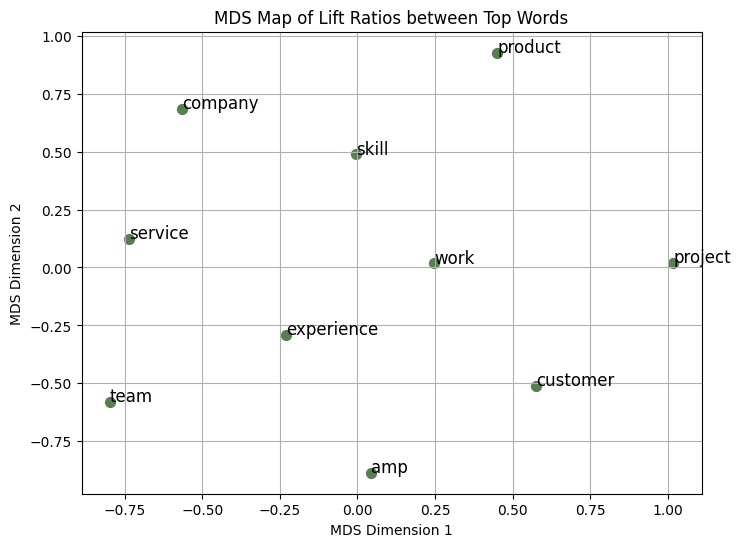

In [16]:
from sklearn.manifold import MDS

# Ensure lift ratio matrix is symmetric
lift_ratios_top_words = lift_ratios_top_words.fillna(0)  # Fill NaN values with 0
lift_ratios_top_words = (lift_ratios_top_words + lift_ratios_top_words.T) / 2  # Symmetrize the matrix

# Initialize and fit MDS model
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(lift_ratios_top_words)

# Plot MDS map
plt.figure(figsize=(8, 6))
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], s=50, c=palette[3])
for i, word in enumerate(lift_ratios_top_words.index):
    plt.text(mds_coordinates[i, 0], mds_coordinates[i, 1], word, fontsize=12)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Map of Lift Ratios between Top Words')
plt.grid(True)
plt.show()

# Classification

## KNN

In [17]:
from sklearn.model_selection import train_test_split
# Features and Labels
X = post['text']
y = post['fraudulent']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (12515,)
X_test shape: (5364,)
Y_train shape: (12515,)
Y_test shape: (5364,)


### First Run Of The KNN Model

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train = X_train.fillna('')
X_test = X_test.fillna('')

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('knn', KNeighborsClassifier(n_neighbors=3)), 
])

pipeline.fit(X_train, Y_train)

Y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9837807606263982
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5104
           1       0.88      0.77      0.82       260

    accuracy                           0.98      5364
   macro avg       0.93      0.88      0.91      5364
weighted avg       0.98      0.98      0.98      5364



#### KNN Confusion Matrix

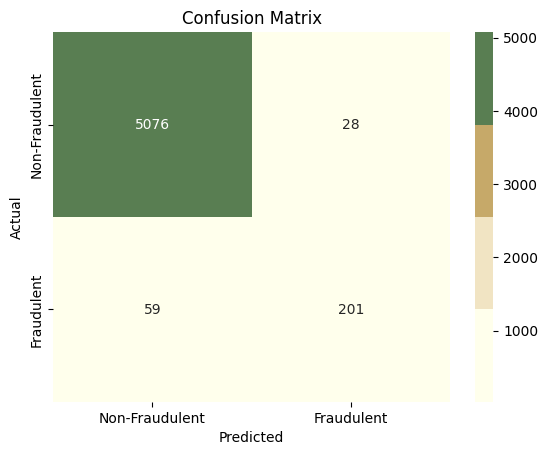

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette(palette, as_cmap=True), 
            xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

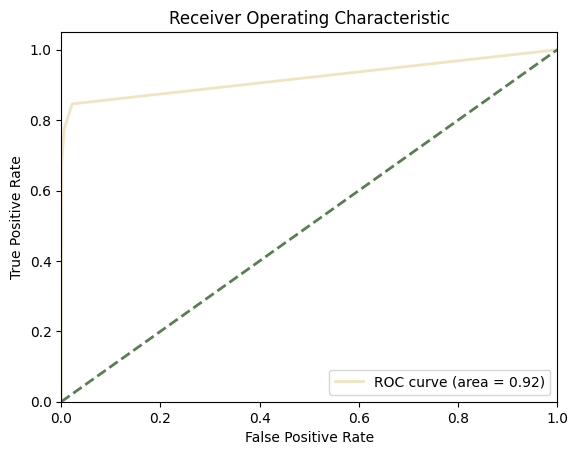

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
Y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color=palette[1], lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color=palette[3], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


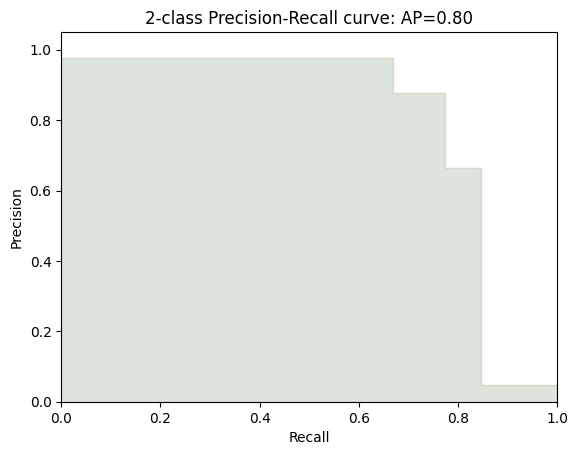

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, Y_score)
average_precision = average_precision_score(Y_test, Y_score)

plt.step(recall, precision, color=palette[1], alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color=palette[3])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()

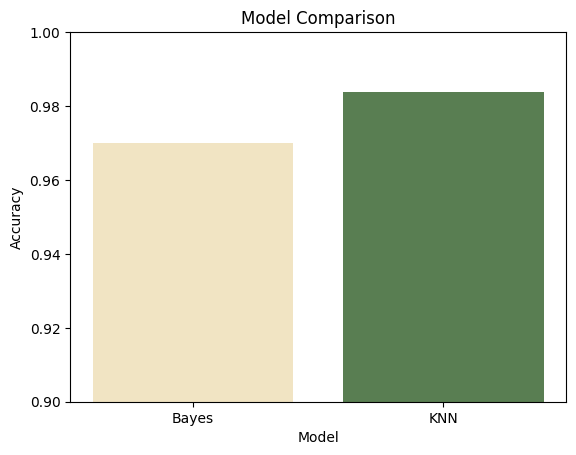

In [30]:
models = ['Bayes', 'KNN']
accuracy = [0.97,0.98378] 

plt.bar(models, accuracy, color=[palette[1],palette[3]])
plt.ylim(0.90, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

## Hyperparameter Tuning Of The Selected Model (Place holder)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('knn', KNeighborsClassifier())
])

parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 3), (2, 2)],  # Trying out different vector methods: unigrams, unigrams+bigrams+trigrams, only bigrams
    'knn__n_neighbors': [3, 5],  # Example KNN parameters
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)

### Second Run Of The Selected Model

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('knn', KNeighborsClassifier(n_neighbors=3)), 
])

pipeline.fit(X_train, Y_train)

Y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))